## Intro

Nuestro problema consistirá en un modelo ML que prediga el precio de nuevos apartamentos en alquiler en Madrid en base a los datos ya existentes en la plataforma Airbnb.

Para ello haremos primeramente un análisis de los datos para hacer una limpieza previa, seleccionar las características que no aportarán valor, y después se probarán distintos modelos para ver cuál obtiene mejores resultados.

## Importo las librerias genéricas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## Cargo el Dataset y hago visualizaciones básicas para conocer mis datos

In [2]:
data = pd.read_csv('./datos/airbnb-listings-extract.csv',sep=';', decimal='.')
data.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."
8,15698621,https://www.airbnb.com/rooms/15698621,20170407214050,2017-04-08,98. Enamorats,"Unique apartment in vibrant neighborhoods, car...",Fantastic apartment located 7 minutes from the...,"Unique apartment in vibrant neighborhoods

In [3]:
data.shape

(14780, 89)

In [4]:
pd.set_option('display.max_rows', None)
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,11210388,17471131,17584891,5398030,18104606,15695269,1295958,1349311,15698621,6766647
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606,https://www.airbnb.com/rooms/15695269,https://www.airbnb.com/rooms/1295958,https://www.airbnb.com/rooms/1349311,https://www.airbnb.com/rooms/15698621,https://www.airbnb.com/rooms/6766647
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170407214050,20170306202425
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-03-07
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II,55. Valencia II Apartment,3 BR + 2 baths near the beach!!,Room & bathroom @ Sagrada Familia,98. Enamorats,"5 Minutes to Downtown, Zilker!"
Summary,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car...","Unique apartment in vibrant neighborhoods, car...",Spacious and quiet apartment that can accommod...,"FEBRUARY 6-10, entire apartment available - 2 ...","Unique apartment in vibrant neighborhoods, car...","Get everywhere in minutes! Charming, tradition..."
Space,This loft has a spectacular view of the hills ...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",You wake up to the sun rising over Barcelona's...,"License: HUTB-005313 Charming apartment, locat...",This fully refurbished apartment has 2 bedroom...,Its size allows to accommodate up to 6 people ...,Our apartment has been recently renovated pres...,Fantastic apartment located 7 minutes from the...,Located on a large tree-covered lot less than ...
Description,Loft in the Hill country 12-15 minutes directl...,"This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",Live like a local in Barcelona's most chic dis...,"Unique apartment in vibrant neighborhoods, car...","Unique apartment in vibrant neighborhoods, car...",Spacious and quiet apartment that can accommod...,"FEBRUARY 6-10, entire apartment available - 2 ...","Unique apartment in vibrant neighborhoods, car...","Get everywhere in minutes! Charming, tradition..."
Experiences Offered,none,none,none,none,none,none,none,none,none,none
Neighborhood Overview,This neighborhood is located in the hills west...,Plaza Cataluña Catalonia Square is the large...,Plaza Cataluña Catalonia Square is the large...,We're right in the heart of the chic L'Eixampl...,NaN,NaN,"This unique area is rich in history, architect...",I love arriving home from work and suddenly se...,NaN,The Tarrytown neighborhood is best known for i...


In [5]:
pd.set_option('display.max_rows', 10)

A la Vista de los resultados, hay claramente una serie de características que no aportan valor, y por tanto se pueden eliminar, procedemos a ello antes de dividir entre train y test.

In [6]:
sobrantes = ['ID','Listing Url','Scrape ID','Name','Summary','Space',
             'Description','Neighborhood Overview','Notes','Transit',
             'Access','Interaction','House Rules','Thumbnail Url','Medium Url',
             'Picture Url','XL Picture Url','Host ID','Host URL','Host Name',
             'Host Location','Host About','Host Response Time','Host Thumbnail Url',
             'Host Picture Url','Host Neighbourhood','Host Verifications','Street',
             'City','State','Country Code','Country','Amenities','Features','Market','Smart Location']
data = data.drop(sobrantes, axis = 1)

In [7]:
data.shape

(14780, 53)

In [8]:
pd.set_option('display.max_columns', None)
data.head(5)

,Last Scraped,Experiences Offered,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,2017-03-07,none,2016-02-11,100.0,NaN,1.0,1.0,NaN,78733,NaN,78733,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782"
1,2017-04-08,none,2016-11-08,100.0,NaN,162.0,162.0,NaN,la Dreta de l'Eixample,Eixample,08010,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,70.0,NaN,NaN,200.0,40.0,2,44,1,1125,today,NaN,6,21,39,309,2017-04-08,1,2017-03-05,2017-03-05,80.0,8.0,10.0,10.0,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017"
2,2017-04-08,none,2016-11-08,100.0,NaN,162.0,162.0,NaN,la Dreta de l'Eixample,Eixample,08008,41.393035,2.162173,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,70.0,NaN,NaN,200.0,60.0,2,42,1,1125,today,NaN,7,21,42,291,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868"
3,2017-04-08,none,2010-05-25,100.0,NaN,27.0,27.0,NaN,la Dreta de l'Eixample,Eixample,08009,41.396967,2.167418,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,NaN,229.0,NaN,NaN,250.0,79.0,2,39,2,1125,today,NaN,11,24,47,316,2017-04-08,13,2016-04-17,2017-03-02,92.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103"
4,2017-04-08,none,2016-01-12,99.0,NaN,207.0,207.0,L'Antiga Esquerra de l'Eixample,l'Antiga Esquerra de l'Eixample,Eixample,08036,41.388685,2.155150,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,NaN,149.0,NaN,NaN,NaN,55.0,1,0,2,1125,today,NaN,0,0,0,7,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616"


## Separación Train / Test

Todavía parece haber gran cantidad de datos que filtrar, no obstante se va a separar el dataset aquí en train y test, para evitar cualquier tipo de *Leakage* y seguir trabajando

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./datos/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./datos/test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./datos/train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11085, 53)
Dimensiones del dataset de test: (3695, 53)


In [10]:
df.shape

(11085, 53)

## Análisis exploratorio de datos

Hay algunas columnas que parece que están vacías, llenas de valores nulos o duplicadas, vamos a ir analizando una a una para filtrar algunos datos, después haremos un análisis de correlación para seguir seleccionando las mejores características para nuestro modelo.

In [11]:
df['Experiences Offered'].value_counts()

none        11073
business        6
social          3
family          2
romantic        1
Name: Experiences Offered, dtype: int64

In [12]:
df['Host Acceptance Rate'].count()

28

In [13]:
print(df['Square Feet'].count())
print(df['Weekly Price'].count())
print(df['Monthly Price'].count())
print(df['License'].count())
print(df['Jurisdiction Names'].count())
print(df['Has Availability'].count())

#Los weekly/monthly price no se pueden eliminar, pero se pueden calcular los vacíos con un price*7 / price*30
#muy probablemente correlen con el precio y se puedan eliminar posteriormente

446
2693
2689
268
158
7


In [14]:
df['Calendar last Scraped'].value_counts()

2017-04-08    7469
2017-04-07    2753
2017-03-15     285
2017-05-09      75
2017-03-04      70
              ... 
2017-03-06       1
2016-05-18       1
2016-04-02       1
2017-05-11       1
2016-04-12       1
Name: Calendar last Scraped, Length: 38, dtype: int64

## Nuevas columnas a eliminar:

Del análisis de los datos:
* 'Experiences Offered'
* 'Host Acceptance Rate'
* 'Geolocation'
* 'Square Feet'
* 'License'
* 'Jurisdiction Names'
* 'Has Availability'

Consideradas irrelevantes:
* 'Calendar Updated'
* 'Calendar last Scraped'
* 'Last Scraped'
* 'Neighbourhood'
* 'Neighbourhood Group Cleansed'
* 'First Review'

No se les ha encontrado significado físico:
* 'Availability 30'
* 'Availability 60'
* 'Availability 90'
* 'Availability 365'
* 'Host Listings Count'
* 'Host Total Listings Count'





In [15]:
sobrantes = ['Experiences Offered','Host Acceptance Rate','Geolocation','Square Feet','Neighbourhood','Neighbourhood Group Cleansed',
             'License','Jurisdiction Names','Has Availability','Calendar Updated','Calendar last Scraped','Last Scraped','First Review',
             'Availability 30','Availability 60','Availability 365','Availability 90','Host Listings Count','Host Total Listings Count']
df = df.drop(sobrantes, axis = 1)

## Modificación de Columnas

Nuestros modelos usan valores enteros, por tanto, todos los campos con texto deberán ser modelados, y todos los campos con fechas tranformados en un entero igualmente relevante. 
* También se filtrarán las instancias por código postal, para quedarnos con los pisos de Madrid (códigos entre 28001 y 28060)
* Las fechas se van a cambiar a días de antiguedad, tomando como referencia la fecha del archivo: 30/11/2020


In [16]:
df['Zipcode'] = pd.to_numeric(df['Zipcode'],errors = 'coerce')
df = df.dropna(subset = ['Zipcode'])
df['Zipcode'] = df['Zipcode'].astype('int')
df = df[(df['Zipcode'] >28000) & (df['Zipcode'] < 28060)]

### Gestión de Columnas Object

In [17]:
from datetime import datetime

df['Host Since'] = df['Host Since'].astype('str')
df['Host Since'] = df['Host Since'].replace('nan', '2000-01-01')
df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

df['Last Review'] = df['Last Review'].astype('str')
df['Last Review'] = df['Last Review'].replace('nan', '2000-01-01')
df['Last Review'] = df['Last Review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

fecha_referencia = datetime.strptime('2020-10-30','%Y-%m-%d')
fecha_referencia

df['fecha_referencia'] = fecha_referencia
df['dias_activo'] = (df['fecha_referencia'] - df['Host Since']).dt.days
df['ult_review'] = (df['fecha_referencia'] - df['Last Review']).dt.days
df = df.drop(['Host Since','Last Review','fecha_referencia'], axis = 1)


Las columnas que faltan se van a codificar usando un mean encoder, pero antes de seguir vamos a hacer la gestión de NAs. Se ha optado por distintos métodos según el significado de cada característica.

In [18]:
col_media = ['Host Response Rate','Review Scores Rating','Review Scores Accuracy',
             'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
             'Review Scores Location','Review Scores Value','Reviews per Month']

col_mediana = ['Bathrooms','Bedrooms','Beds','Price']
medias = {}
medianas = {}

for i in col_media:
    medias[i] = df[i].mean()
    df[i].fillna(medias[i], inplace = True)
    
for i in col_mediana:
    medianas[i] = df[i].median()
    df[i].fillna(medianas[i], inplace = True)
    
df['Weekly Price'].fillna(df['Price']*7, inplace = True)
df['Monthly Price'].fillna(df['Price']*30, inplace = True)
df['Security Deposit'].fillna(0, inplace = True)
df['Cleaning Fee'].fillna(0, inplace = True)

pd.set_option('display.max_rows', None)

df.dtypes


Host Response Rate                float64
Neighbourhood Cleansed             object
Zipcode                             int32
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Number of Reviews                   int64
Review Scores Rating              float64
Review Scores Accuracy            

Una vez que ya están los NA eliminados, y sólo tenemos las variables categóricas, aparte de integers y floats, aplicamos el mean encoder y empezamos a sacar conclusiones de los datos.

In [19]:
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy','Zipcode']

mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

df.head()   

,Host Response Rate,Neighbourhood Cleansed,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,dias_activo,ult_review
1,90.0,45.317308,68.102371,40.402084,-3.703015,69.119286,38.695699,2,2.0,1.0,1.0,68.410305,19.0,133.0,570.0,0.0,0.0,1,10,1,1125,1,80.000000,8.000000,8.000000,10.000000,10.000000,6.000000,8.000000,62.592390,3.0,0.12,1780,1560
2,75.0,60.997035,68.102371,40.408859,-3.708319,69.119286,87.643668,7,2.0,3.0,5.0,68.410305,165.0,1155.0,4950.0,200.0,50.0,4,10,2,1125,2,100.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,76.492777,145.0,0.10,2233,1581
4,100.0,86.764368,81.689882,40.419764,-3.700695,69.119286,87.643668,4,1.0,0.0,1.0,68.410305,95.0,665.0,2850.0,0.0,0.0,2,20,3,1125,1,80.000000,10.000000,6.000000,10.000000,10.000000,10.000000,8.000000,76.492777,13.0,0.11,1966,1579
5,0.0,81.753546,81.689882,40.418288,-3.698892,42.440000,38.695699,1,2.0,1.0,1.0,68.410305,30.0,210.0,900.0,0.0,0.0,1,0,1,1125,1,91.576018,9.407128,9.322256,9.626276,9.646186,9.546937,9.209228,62.592390,1.0,0.07,1729,1724
6,100.0,24.000000,29.758621,40.393510,-3.771178,69.119286,38.695699,1,1.0,1.0,1.0,68.410305,16.0,112.0,480.0,0.0,0.0,1,0,1,15,13,88.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,63.174338,1.0,2.55,1473,1323


<Figure size 720x720 with 0 Axes>

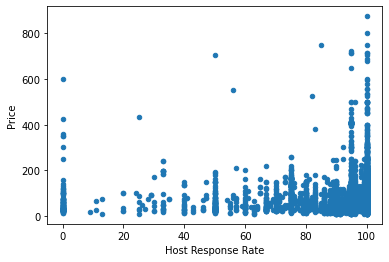

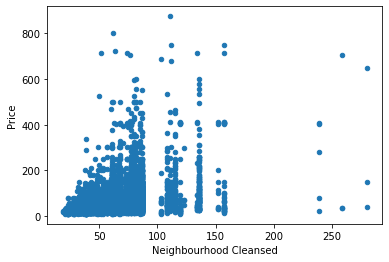

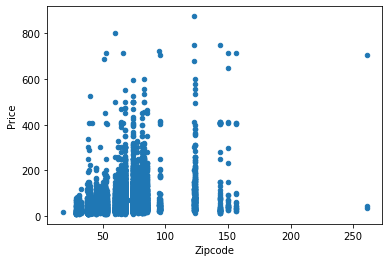

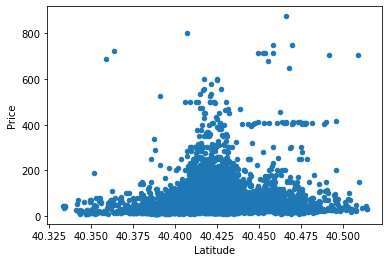

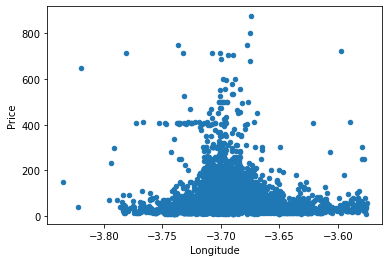

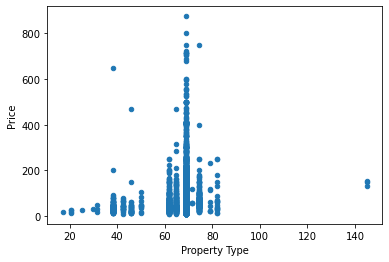

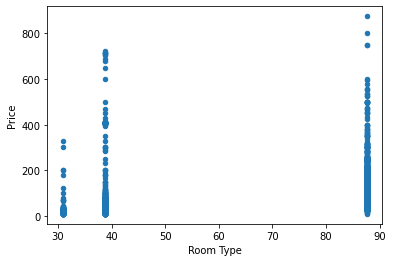

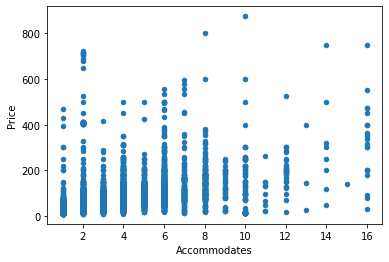

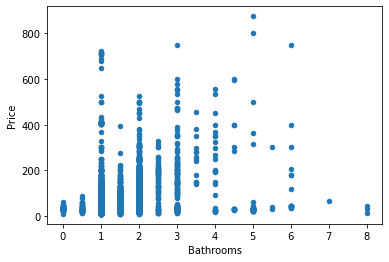

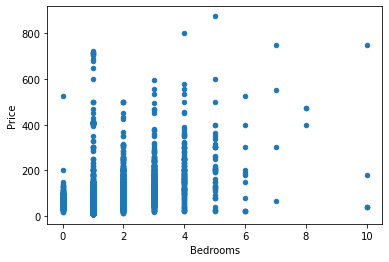

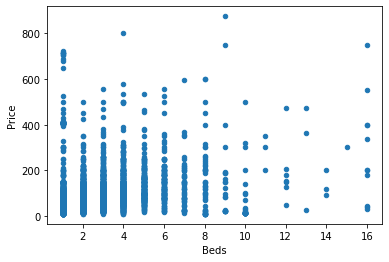

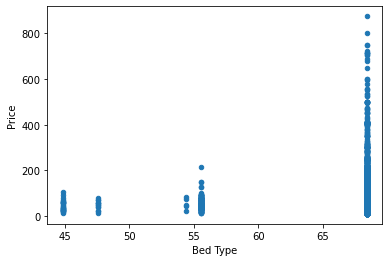

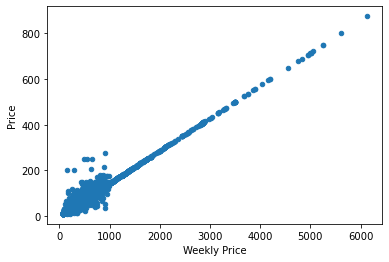

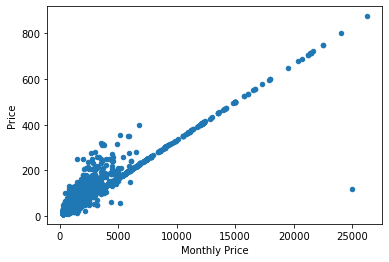

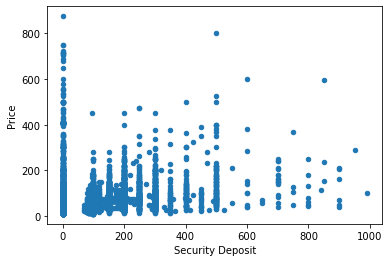

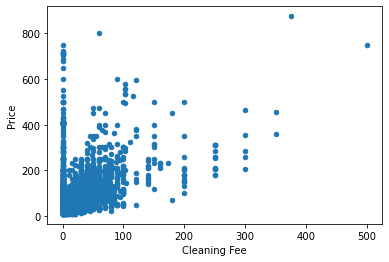

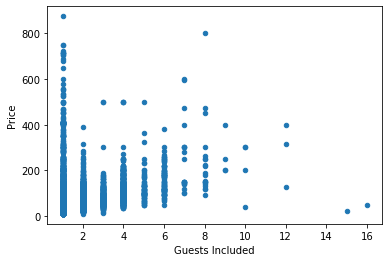

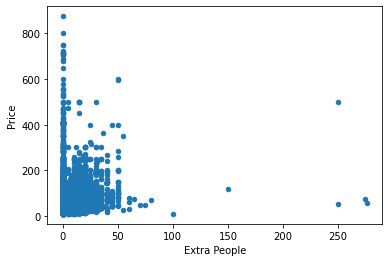

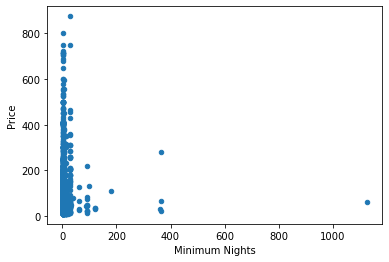

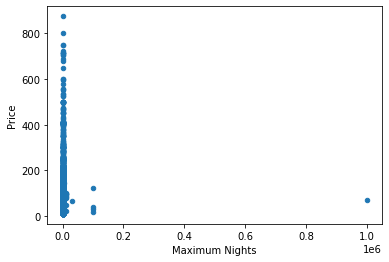

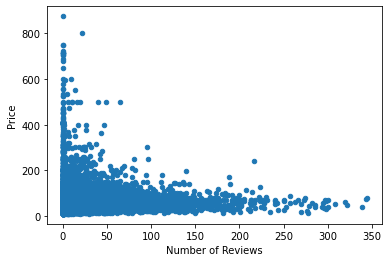

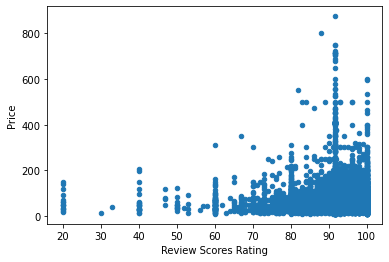

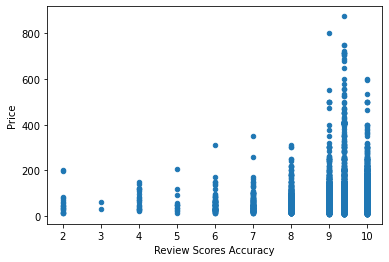

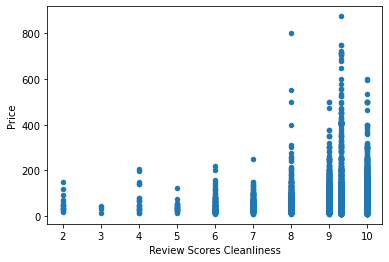

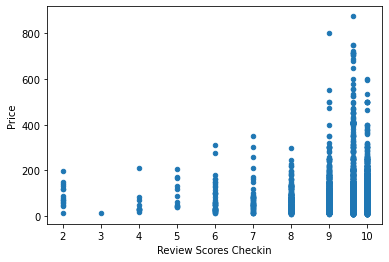

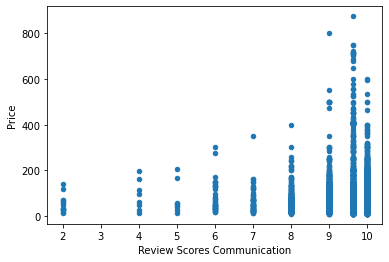

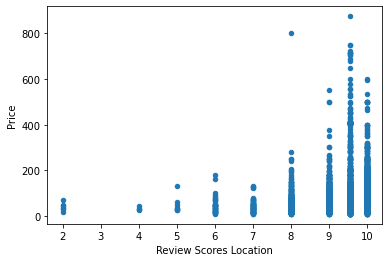

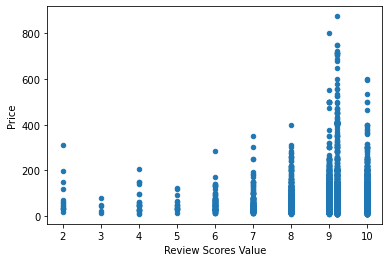

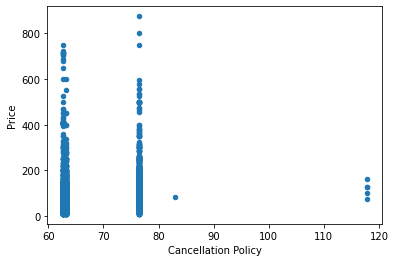

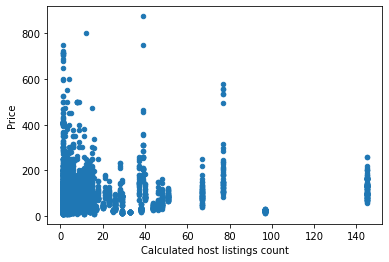

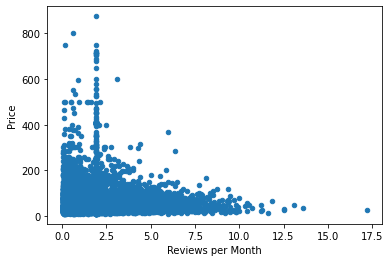

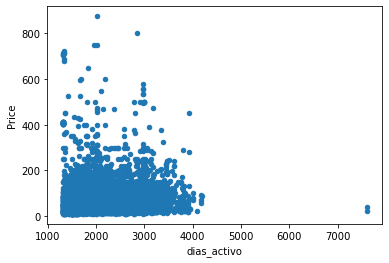

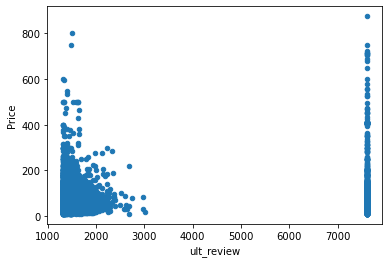

In [20]:
plt.figure(figsize=(10,10))

for feature in df.columns.drop(['Price']):
    df.plot(kind = 'scatter',x=feature, y = 'Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

A simple vista no se aprecian grandes relaciones entre variables, aunque lo que sí está claro es que se puede hacer un primer filtrado por precios muy cercanos a cero (<15€ en este caso, con 20€ ya se eliminaban 600 registros)

También se ve que hay muy pocas por encima de 500€, también las eliminamos

Se eliminan también algunos outlyers mas, siempre vigilando no empequeñecer demasido el dataset.

In [21]:
df.shape

(9644, 34)

In [22]:
df = df[(df['Price'] >= 15) & (df['Price'] <500)]
df = df[df['Host Response Rate'] != 0]
df = df[df['Cleaning Fee'] < 310]
df = df[df['Neighbourhood Cleansed'] < 140]
df = df[(df['Property Type'] > 30) & (df['Property Type'] < 100)]
df = df[df['Bathrooms'] <= 4]
df = df[df['Bedrooms'] < 6]
df = df[df['Beds'] < 9]
df = df[df['Guests Included'] < 9]
df = df[df['Extra People'] <= 50]
df = df[df['Minimum Nights'] <= 30]
df = df[df['Cancellation Policy'] < 80]
df = df[df['dias_activo'] < 4000]
df = df[df['Zipcode'] < 140]
df = df[df['Monthly Price'] < 15000]

df = df.drop(['Maximum Nights'], axis = 1)
df = df.drop(['ult_review'], axis = 1)

df.shape

(9086, 32)

<Figure size 720x720 with 0 Axes>

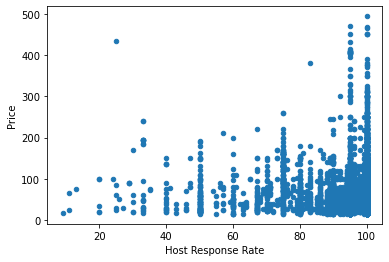

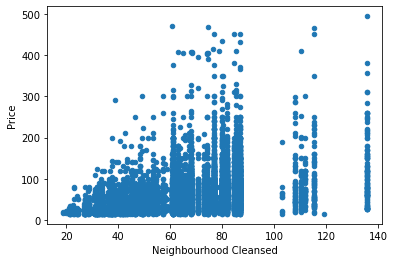

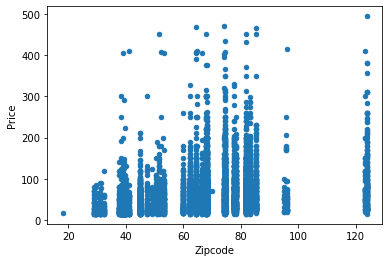

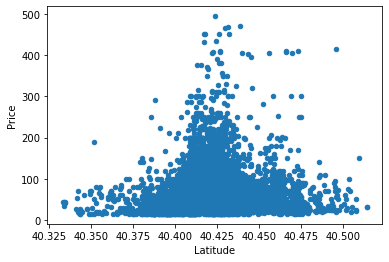

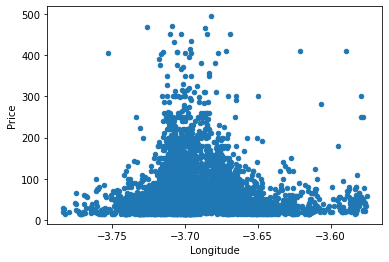

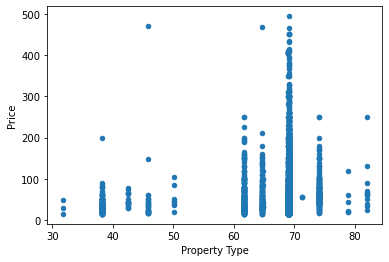

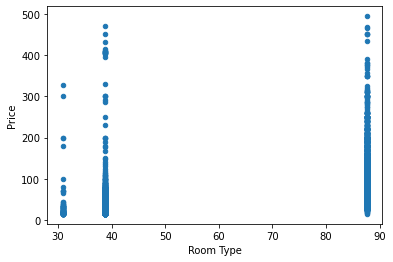

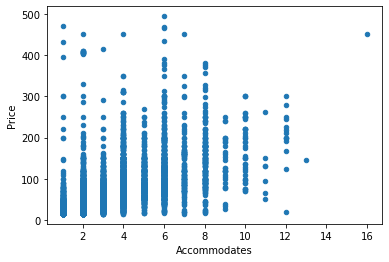

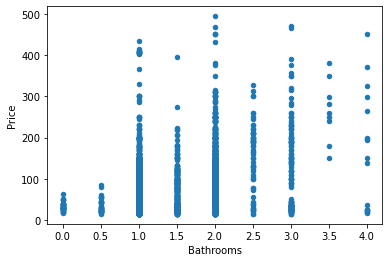

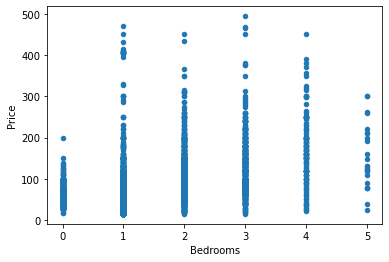

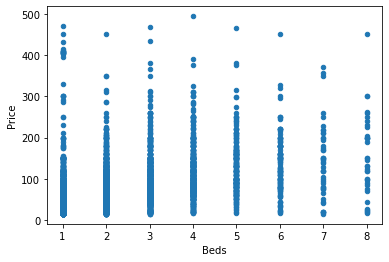

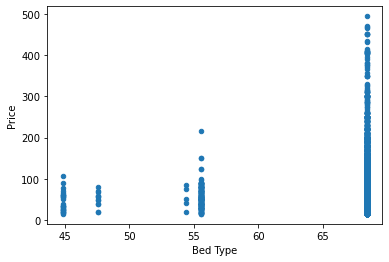

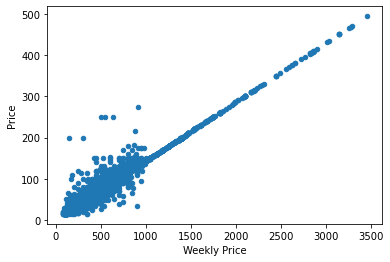

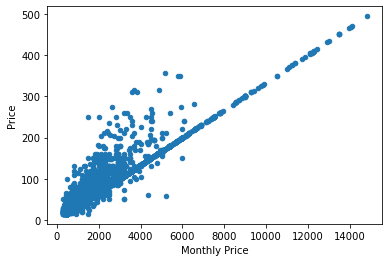

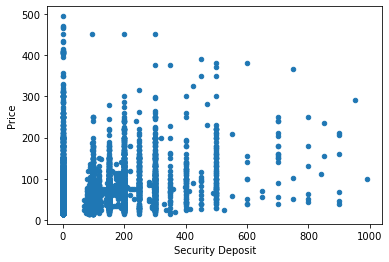

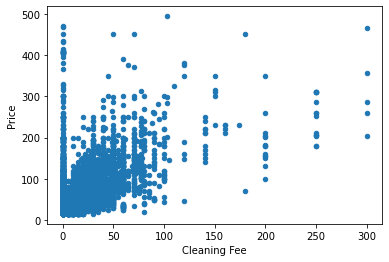

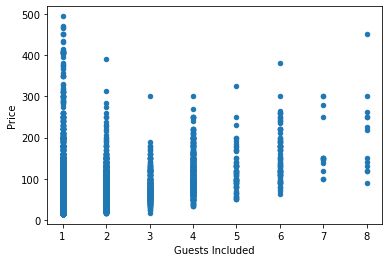

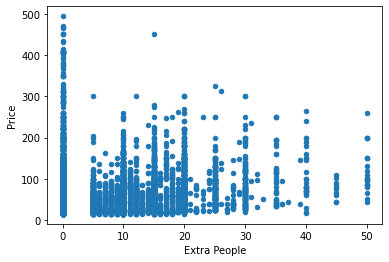

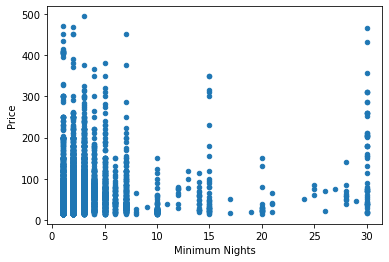

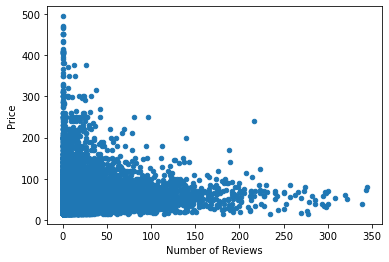

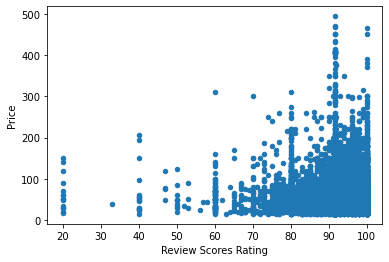

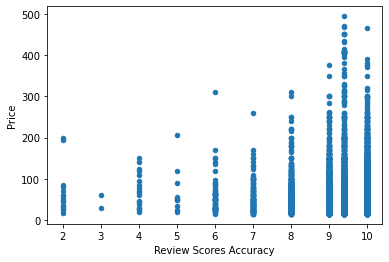

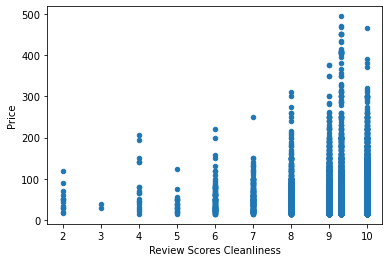

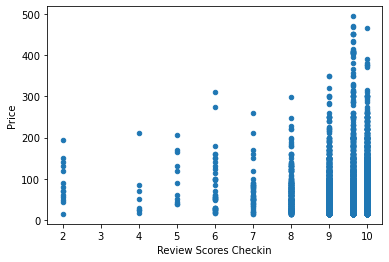

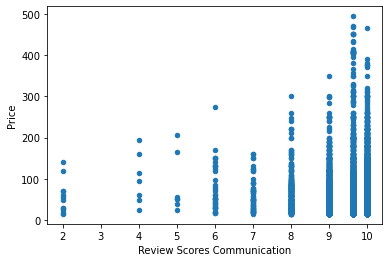

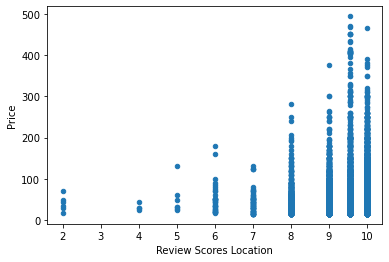

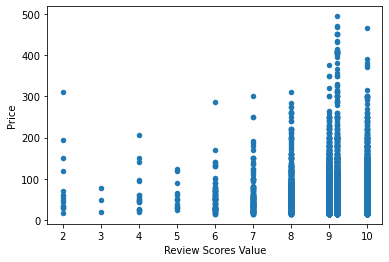

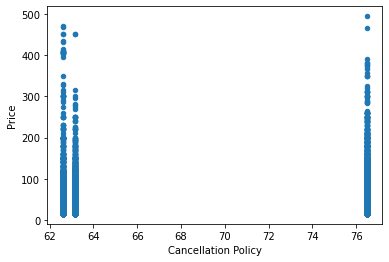

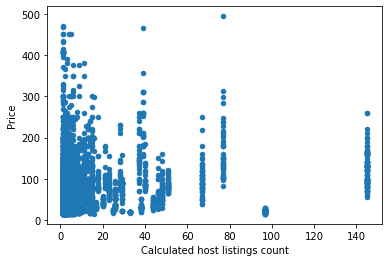

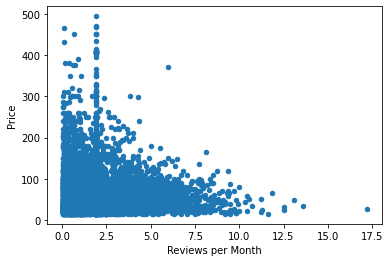

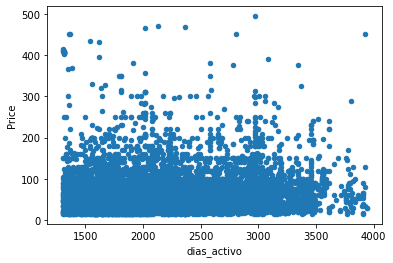

In [23]:
plt.figure(figsize=(10,10))

for feature in df.columns.drop(['Price']):
    df.plot(kind = 'scatter',x=feature, y = 'Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

Seguimios teniendo algunos outlyers, pero el dataset está mucho mejor acotado.

### Análisis de correlación de las variables
En este caso, y como hay variables que hemos sacado a partir de la variable objetivo, se incluye la variable objetivo, a modo de primer análisis para ver qué variables correlarían mejor, y además para comprobar que efectivamente esas variables que hemos calculado a partir de la objetivo, deberíamos eliminarlas del análisis para no distorsionar los resultados

Se observa también que todas las Review Scores están muy relacionadas entre ellas, por lo que perfectamente podemos seleccionar una y eliminar el resto de nuestro análisis

También correla muy bien el código postal con el barrio, pero por conocimiento del dataset se sabe que no son exactamente lo mismo, y que un barrio puede contener distintos zipcodes, por lo que se mantienen ambas características

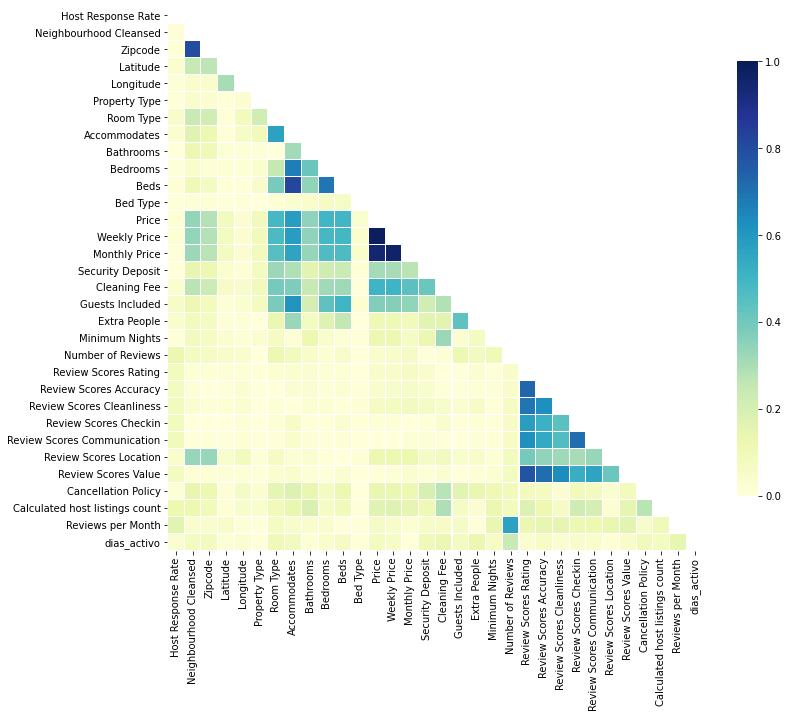

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [25]:
columns_to_drop = ['Weekly Price', 'Monthly Price', 'Review Scores Accuracy','Review Scores Cleanliness',
                   'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value',
                   'Reviews per Month','Accommodates']

df = df.drop(columns_to_drop, axis = 1)

A partir de aquí divido entre X e y, para acabar de hacer la selección de características y probar los distintos modelos, guardando los originales en variables aparte para probar distintos modelos a partir de ellos.

In [26]:
df.columns

Index(['Host Response Rate', 'Neighbourhood Cleansed', 'Zipcode', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'dias_activo'],
      dtype='object')

In [27]:
df = df[['Price','Host Response Rate', 'Neighbourhood Cleansed', 'Zipcode', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'dias_activo']]

#Convierto a formato válido para SKLearn (no pandas DF)
MainDF = df.values

#Creo los arrays X e y, y el feature_names que usaré para las representaciones gráficas
X_trainMain = MainDF[:,1:]
y_trainMain = MainDF[:,0]
feature_names = df.columns[1:]

### Carga de los datos de Test para comprobar modelos

Recuperamos los datos de Test del fichero csv, les aplicamos todas las transformaciones que hemos aplicado a este dataset, y guardamos los nuevos arrays en variables para comprobar posteriormente los modelos

In [28]:
df_test = pd.read_csv('./datos/test.csv', sep=';', decimal='.')

sobrantes = ['Experiences Offered','Host Acceptance Rate','Geolocation','Square Feet','Neighbourhood','Neighbourhood Group Cleansed',
             'License','Jurisdiction Names','Has Availability','Calendar Updated','Calendar last Scraped','Last Scraped','First Review',
             'Availability 30','Availability 60','Availability 365','Availability 90','Host Listings Count','Host Total Listings Count']
df_test = df_test.drop(sobrantes, axis = 1)

df_test['Zipcode'] = pd.to_numeric(df_test['Zipcode'],errors = 'coerce')
df_test = df_test.dropna(subset = ['Zipcode'])
df_test['Zipcode'] = df_test['Zipcode'].astype('int')
df_test = df_test[(df_test['Zipcode'] >28000) & (df_test['Zipcode'] < 28060)]

df_test['Host Since'] = df_test['Host Since'].astype('str')
df_test['Host Since'] = df_test['Host Since'].replace('nan', '2000-01-01')
df_test['Host Since'] = df_test['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

df_test['Last Review'] = df_test['Last Review'].astype('str')
df_test['Last Review'] = df_test['Last Review'].replace('nan', '2000-01-01')
df_test['Last Review'] = df_test['Last Review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

fecha_referencia = datetime.strptime('2020-10-30','%Y-%m-%d')
fecha_referencia

df_test['fecha_referencia'] = fecha_referencia
df_test['dias_activo'] = (df_test['fecha_referencia'] - df_test['Host Since']).dt.days
df_test['ult_review'] = (df_test['fecha_referencia'] - df_test['Last Review']).dt.days
df_test = df_test.drop(['Host Since','Last Review','fecha_referencia'], axis = 1)

#relleno medias y medianas con las obtenidas en TRAIN
for i in col_media:
    df_test[i].fillna(medias[i], inplace = True)
    
for i in col_mediana:
    df_test[i].fillna(medianas[i], inplace = True)
    
df_test['Weekly Price'].fillna(df_test['Price']*7, inplace = True)
df_test['Monthly Price'].fillna(df_test['Price']*30, inplace = True)
df_test['Security Deposit'].fillna(0, inplace = True)
df_test['Cleaning Fee'].fillna(0, inplace = True)

for c in categorical:
     df_test[c] = df_test[c].map(mean_map[c])

df_test = df_test[(df_test['Price'] >= 15) & (df_test['Price'] <500)]
df_test = df_test[df_test['Host Response Rate'] != 0]
df_test = df_test[df_test['Cleaning Fee'] < 310]
df_test = df_test[df_test['Neighbourhood Cleansed'] < 140]
df_test = df_test[(df_test['Property Type'] > 30) & (df_test['Property Type'] < 100)]
df_test = df_test[df_test['Bathrooms'] <= 4]
df_test = df_test[df_test['Bedrooms'] < 6]
df_test = df_test[df_test['Beds'] < 9]
df_test = df_test[df_test['Guests Included'] < 9]
df_test = df_test[df_test['Extra People'] <= 50]
df_test = df_test[df_test['Minimum Nights'] <= 30]
df_test = df_test[df_test['Cancellation Policy'] < 80]
df_test = df_test[df_test['dias_activo'] < 4000]
df_test = df_test[df_test['Zipcode'] < 140]
df_test = df_test[df_test['Monthly Price'] < 15000]

df_test = df_test.drop(['Maximum Nights'], axis = 1)
df_test = df_test.drop(['ult_review'], axis = 1)

columns_to_drop = ['Weekly Price', 'Monthly Price', 'Review Scores Accuracy','Review Scores Cleanliness',
                   'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value',
                   'Reviews per Month','Accommodates']

df_test = df_test.drop(columns_to_drop, axis = 1)

df_test = df_test[['Price','Host Response Rate', 'Neighbourhood Cleansed', 'Zipcode', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count', 'dias_activo']]

MainTest = df_test.values
X_testMain = MainTest[:,1:]
y_testMain = MainTest[:,0]

print(f'el tamaño del dataset de train es de: {df.shape}')
print(f'el tamaño del dataset de test es de: {df_test.shape}')
df_test.head()

el tamaño del dataset de train es de: (9086, 22)
el tamaño del dataset de test es de: (3031, 22)


,Price,Host Response Rate,Neighbourhood Cleansed,Zipcode,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,dias_activo
0,15.0,100.000000,23.000000,28.863636,40.346320,-3.691440,69.119286,38.695699,1.0,1.0,1.0,68.410305,0.0,5.0,1,0,1,11,100.000000,62.592390,1.0,1614
1,25.0,100.000000,76.936039,81.689882,40.414423,-3.712847,69.119286,38.695699,1.0,1.0,1.0,55.518072,175.0,20.0,1,0,3,17,96.000000,63.174338,3.0,2090
2,45.0,80.000000,80.269231,77.635739,40.437012,-3.698987,69.119286,87.643668,1.0,1.0,1.0,68.410305,150.0,20.0,1,25,1,0,91.576018,76.492777,1.0,2978
3,25.0,94.829474,30.886364,39.188482,40.407932,-3.744533,69.119286,38.695699,1.0,1.0,1.0,68.410305,0.0,0.0,1,0,1,1,100.000000,63.174338,1.0,1978
4,40.0,94.829474,60.997035,67.790968,40.410107,-3.704869,69.119286,87.643668,1.0,0.0,2.0,68.410305,0.0,0.0,1,0,1,0,91.576018,62.592390,2.0,1936


### Aplicación de métodos de filtrado

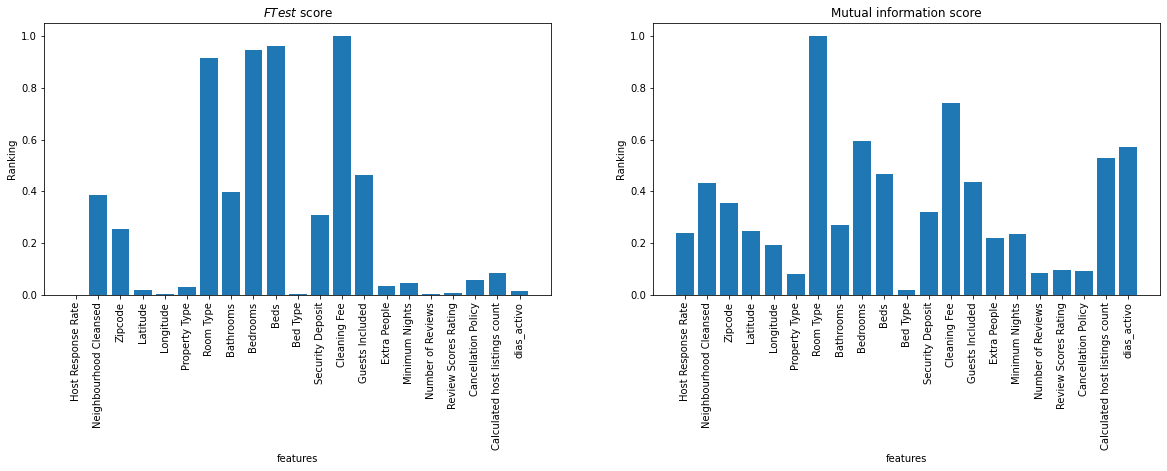

In [29]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X_trainMain, y_trainMain)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_trainMain, y_trainMain)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_trainMain.shape[1]),f_test,  align="center")
plt.xticks(range(X_trainMain.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$FTest$ score')

plt.subplot(1,2,2)
plt.bar(range(X_trainMain.shape[1]),mi, align="center")
plt.xticks(range(X_trainMain.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Según estos modelos, que no tienen en cuenta las relaciones entre variables, parece que las columnas menos relevantes serían: 
* Property Type
* Bed Type
* Number of Reviews
* Review Scores Rating
* Cancellation Policy

A la vista de estos resultados parece que hay varias características que podrían ser eliminadas, pero por ahora se van a mantener. Se van a entrenar tres modelos de regresión:
* Regularización Lasso
* Random Forest
* SVMs

De los cuales se compararán resultados, se seleccionará el que mejor resultado haya ofrecido, y se volverá a probar el entrenamiento con una selección de características mucho más acotada, comparando los resultados del modelo y esperando una gran mejora de rendimiento con una pérdida muy baja de precisión del modelo

## Regularización Lasso

In [30]:
X_train = X_trainMain
y_train = y_trainMain
X_test = X_testMain
y_test = y_testMain

In [32]:
from sklearn import preprocessing
# Escalado de valores (siempre con datos de Train)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

best mean cross-validation score: -1119.876
best parameters: {'alpha': 0.09540954763499963}


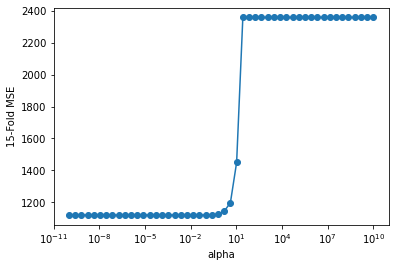

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 15)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha')
plt.ylabel('15-Fold MSE')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.11e+03
MSE Modelo Lasso (test) : 842
RMSE Modelo Lasso (train): 33.3
RMSE Modelo Lasso (test) : 29
Host Response Rate -1.648416110107203
Neighbourhood Cleansed 8.77903339336637
Zipcode 0.3572697293601548
Latitude 0.377518439677066
Longitude -0.0
Property Type -0.19262248534200802
Room Type 12.881180898553179
Bathrooms 6.699879581173111
Bedrooms 9.55448455394752
Beds 5.736165015743442
Bed Type 0.7039557329066617
Security Deposit 0.8317166288169482
Cleaning Fee 10.177741438529024
Guests Included 2.408852568995707
Extra People -3.198575392240497
Minimum Nights -0.7944331283431931
Number of Reviews -3.758406133057301
Review Scores Rating 2.5299953379125437
Cancellation Policy -1.1946806138426507
Calculated host listings count 0.4852921840941014
dias_activo 0.5533904918439251


In [43]:
lasso = Lasso(alpha = 0.6).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.12e+03
MSE Modelo Lasso (test) : 846
RMSE Modelo Lasso (train): 33.4
RMSE Modelo Lasso (test) : 29.1
Host Response Rate -1.2151766717875747
Neighbourhood Cleansed 8.624465488309069
Zipcode 0.15916920155469416
Latitude 0.028371319784004565
Longitude 0.0
Property Type -0.0
Room Type 12.617327465948335
Bathrooms 6.399667517924369
Bedrooms 9.679517832163894
Beds 5.5899554726911145
Bed Type 0.21046778902883848
Security Deposit 0.5090104025591723
Cleaning Fee 9.879145074100734
Guests Included 1.7105785415155537
Extra People -2.179775292492994
Minimum Nights -0.0
Number of Reviews -3.149899826470234
Review Scores Rating 1.91025181487087
Cancellation Policy -0.47558234209073863
Calculated host listings count 0.0
dias_activo 0.0


## Random Forest Regressor

best mean cross-validation score: 0.684
best parameters: {'max_depth': 14}


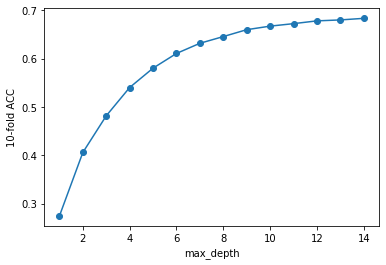

In [44]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [45]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.90046333666452
Test:  0.6825373364689771


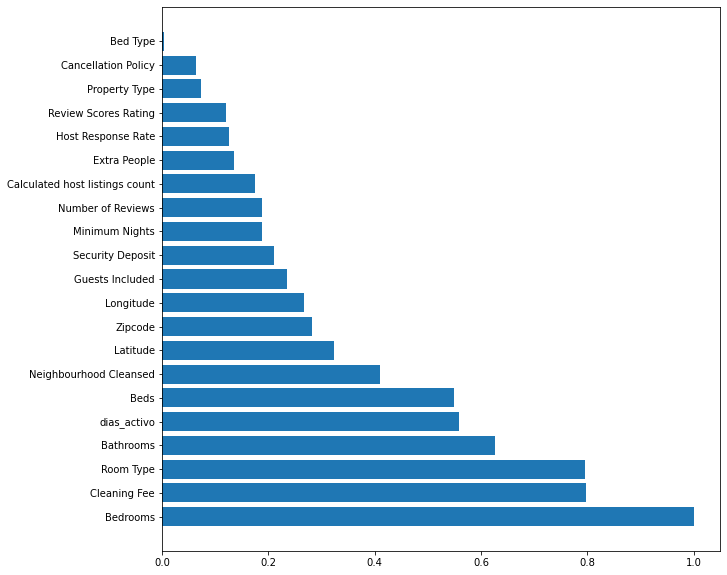

In [46]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

t la vista del resultado, parece que este modelo incurre en algo de overfitting (score train sustancialmente mayor que en test, por lo que vamos a probar un segundo modelo con parámetros mas genéricos y ver si se comporta de mejor manera

In [47]:
bagModel = RandomForestRegressor(max_depth=8,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.737462023144762
Test:  0.6511398782219511


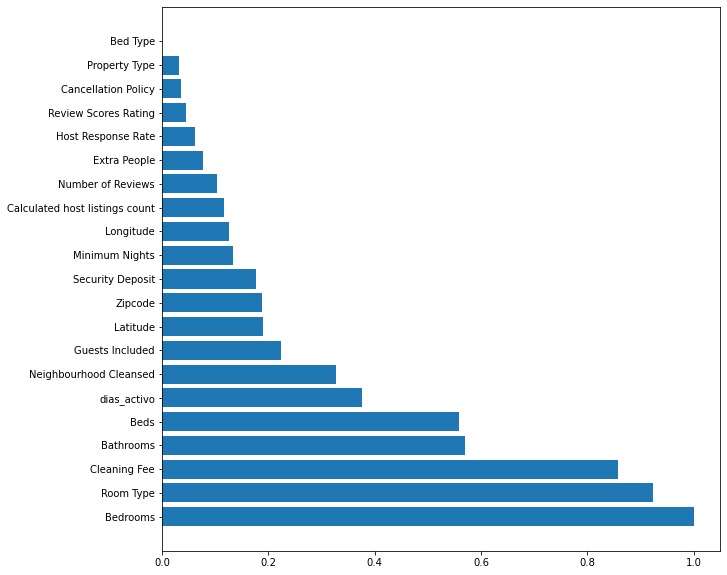

In [48]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

A la vista de este modelo, se puede ver que ya generaliza un poco mejor, y que los parámetros con más peso son los mismos que en Lasso (los 5 primeros). Sorprende el sexto, días_activo, que Lasso directamente había eliminado

## SVM + Kernel Regression

In [49]:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled  = scaler.transform(X_test)

In [54]:
from sklearn.svm import SVR

vectorC = np.logspace(2, 4, 10)
vectorG = np.logspace(-5, 2, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 87.8min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([  100.        ,   166.81005372,   278.25594022,   464.15888336,
         774.26368268,  1291.54966501,  2154.43469003,  3593.8136638 ,
        5994.84250319, 10000.        ]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             verbose=1)

best mean cross-validation score: 0.605
best parameters: {'C': 774.263682681127, 'gamma': 0.01}


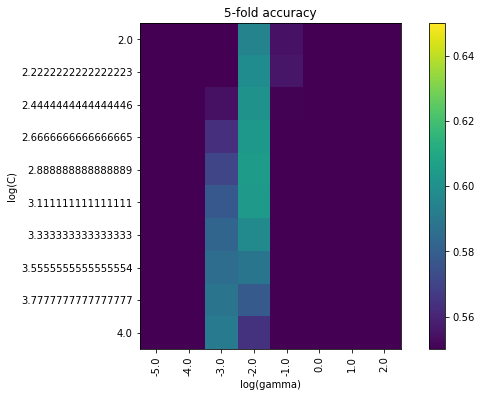

In [60]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.55, vmax=0.65)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

## Prueba Final

A la vista de los resultados, en este caso nos decantaríamos por un modelo Random Forest en regresión, ya que sus tiempos de computación son mucho más ligeros que en el modelo SVM, y además la accuracy en test parece un 5% mejor. 

Para ver la influencia de las variables mas minoritarias, se vuelve a entrenar el modelo Random Forest con un dataset reducido en el que solo se tienen en cuenta 7 características, y se compara el resultado con el anterior para ver si no se pierde demasiada precisión

In [79]:
reduced_train = df[['Price','Neighbourhood Cleansed','Room Type','Bathrooms', 'Bedrooms','dias_activo','Beds','Cleaning Fee']]
reduced_test = df_test[['Price','Neighbourhood Cleansed','Room Type','Bathrooms', 'Bedrooms','dias_activo','Beds','Cleaning Fee']]
reduced_test.head()

,Price,Neighbourhood Cleansed,Room Type,Bathrooms,Bedrooms,dias_activo,Beds,Cleaning Fee
0,15.0,23.000000,38.695699,1.0,1.0,1614,1.0,5.0
1,25.0,76.936039,38.695699,1.0,1.0,2090,1.0,20.0
2,45.0,80.269231,87.643668,1.0,1.0,2978,1.0,20.0
3,25.0,30.886364,38.695699,1.0,1.0,1978,1.0,0.0
4,40.0,60.997035,87.643668,1.0,0.0,1936,2.0,0.0


In [80]:
reduced_train = reduced_train.values
X_redtrain = reduced_train[:,1:]
y_redtrain = reduced_train[:,0]
reduced_test = reduced_test.values
X_redtest = reduced_test[:,1:]
y_redtest = reduced_test[:,0]

best mean cross-validation score: 0.650
best parameters: {'max_depth': 11}


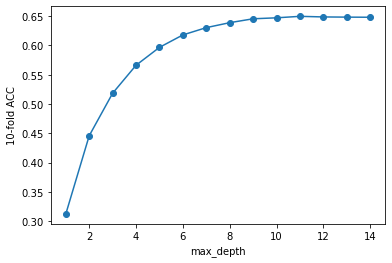

In [77]:
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_redtrain, y_redtrain)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [85]:
bagModel = RandomForestRegressor(max_depth=9,n_estimators=200,max_features='sqrt').fit(X_redtrain,y_redtrain)

print("Train: ",bagModel.score(X_redtrain,y_redtrain))
print("Test: ",bagModel.score(X_redtest,y_redtest))

Train:  0.7442098770795049
Test:  0.6352420102248025


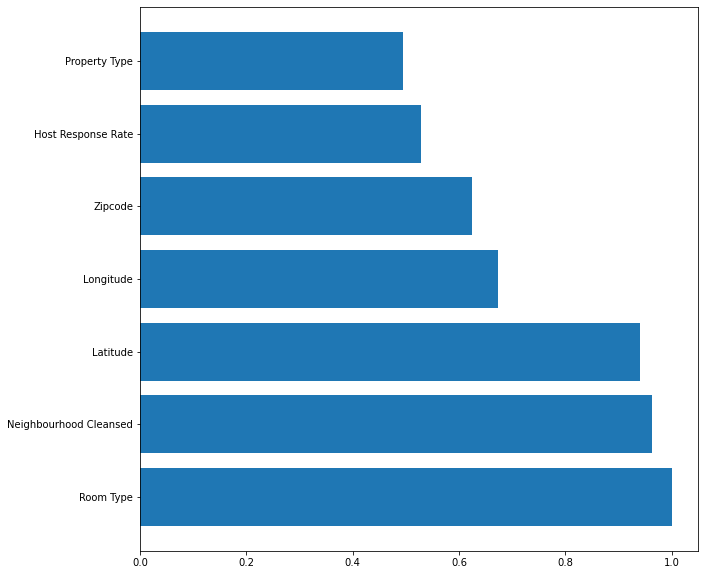

In [86]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_redtrain.shape[1]),importances[indices])
plt.yticks(range(X_redtrain.shape[1]),feature_names[indices])
plt.show()